In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
obesity = pd.read_csv("train.csv")
obesity.head()

id  Gender        Age    Height      Weight family_history_with_overweight  \
0   0    Male  24.443011  1.699998   81.669950                            yes   
1   1  Female  18.000000  1.560000   57.000000                            yes   
2   2  Female  18.000000  1.711460   50.165754                            yes   
3   3  Female  20.952737  1.710730  131.274851                            yes   
4   4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

### Data description

* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC)
* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

### NObesity values are:

* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40


In [3]:
obesity.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

* as checked there are no missing values in the dataset

In [4]:
obesity = obesity.drop(['id'],axis = 1)
obesity.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  
1  1.000000         no             Automobile        Normal_Weight  
2  1.673584         no  Public_Transportation  Insufficient_Weight  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II

## Exploratary Data Analysis

In [5]:
obesity['BMI'] = obesity['Weight'] / ((obesity['Height'])*2)
obesity.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  24.020602  
1  1.000000         no             Automobile        Normal_Weight  18.269231  
2  1.673584         no  Public_Transportation  Insufficient_Weight  14.655836  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  38.368080  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  24.500768

In [6]:
obesity.shape

(20758, 18)

### Univariate Data Analysis

In [7]:
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

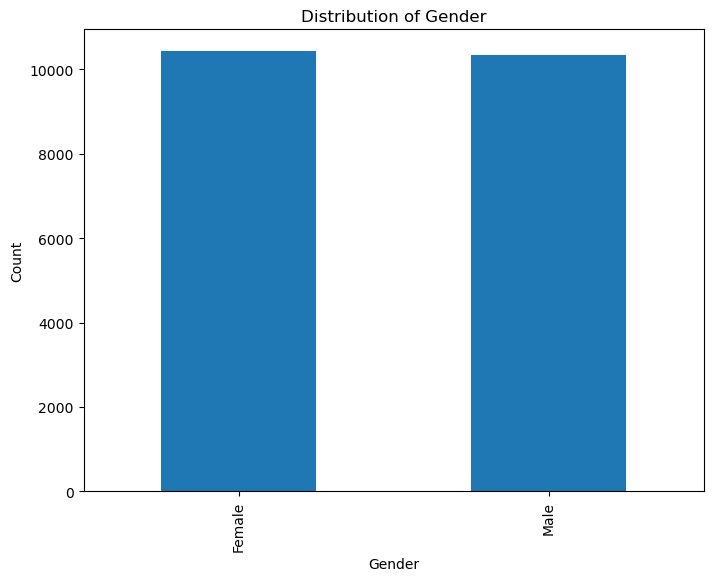

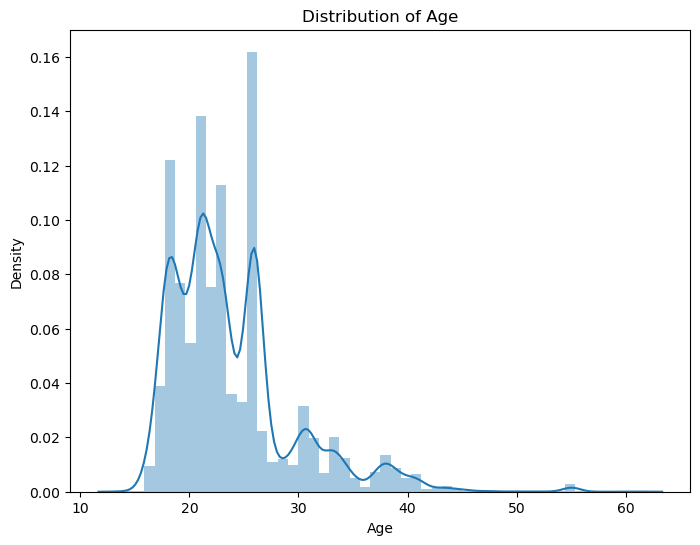

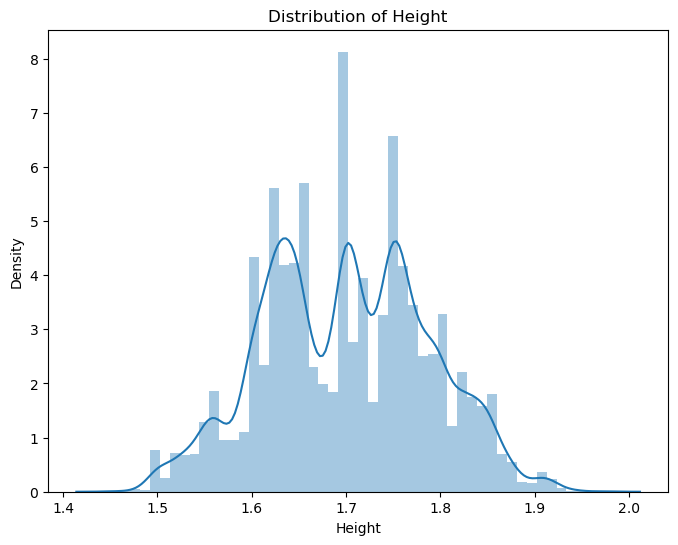

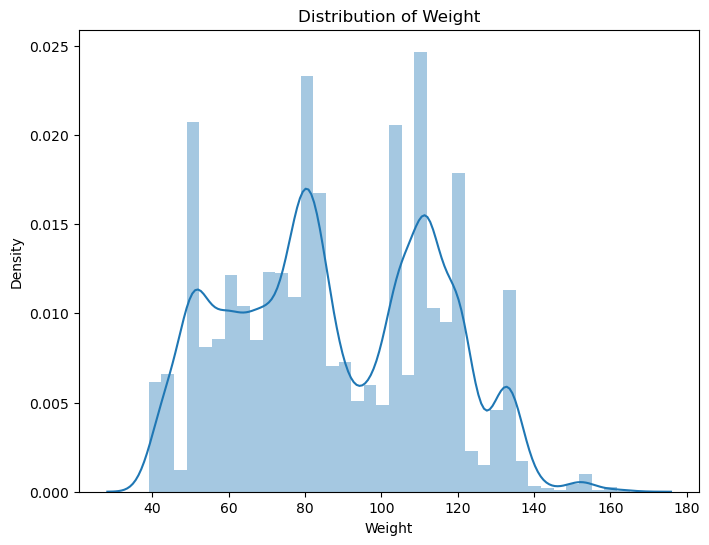

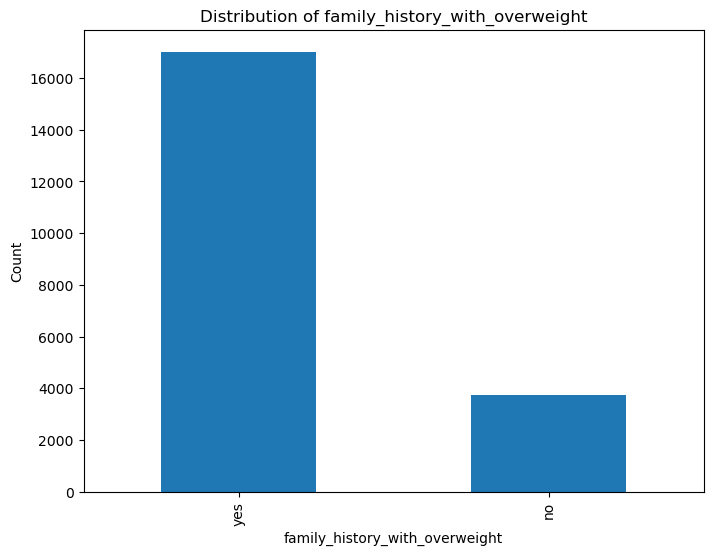

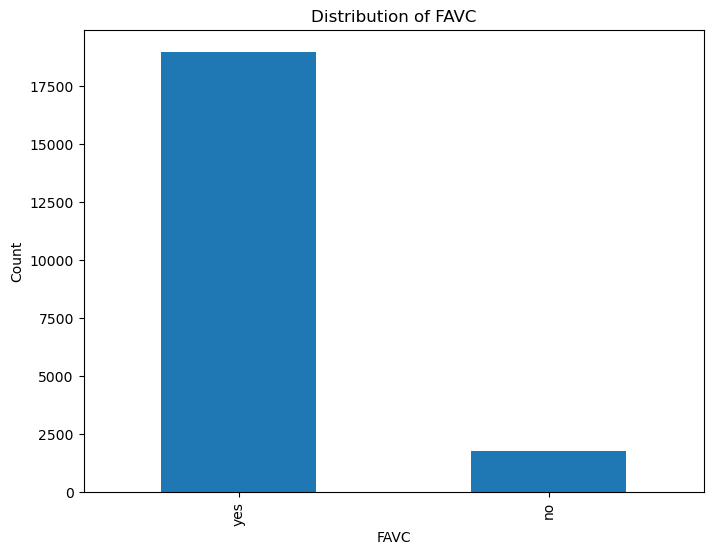

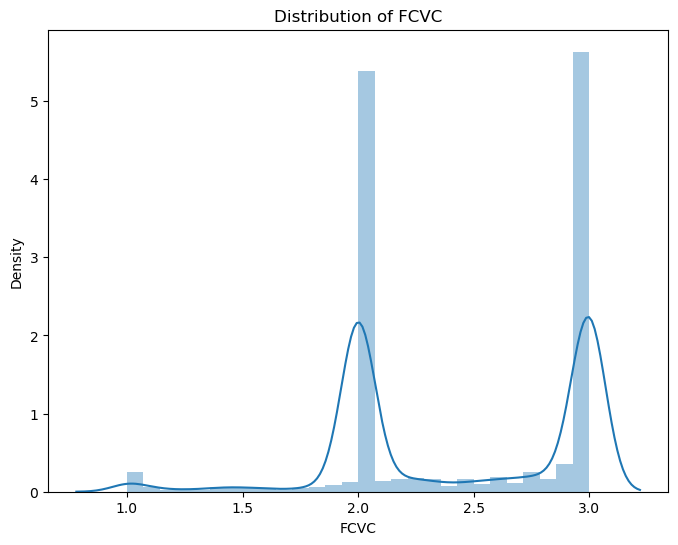

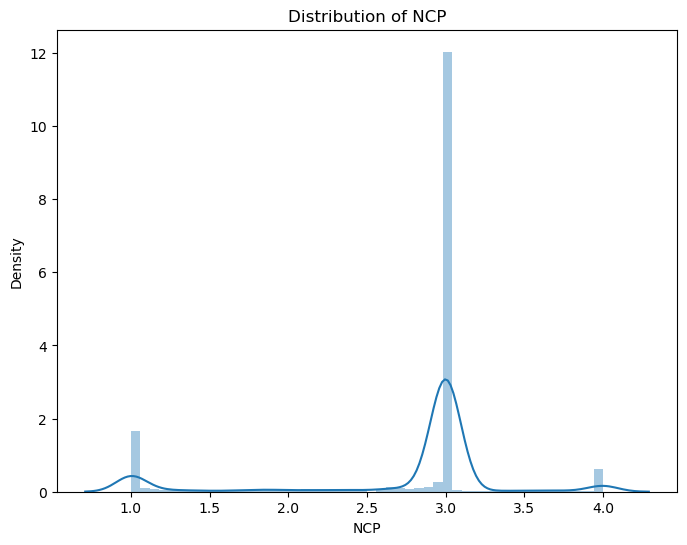

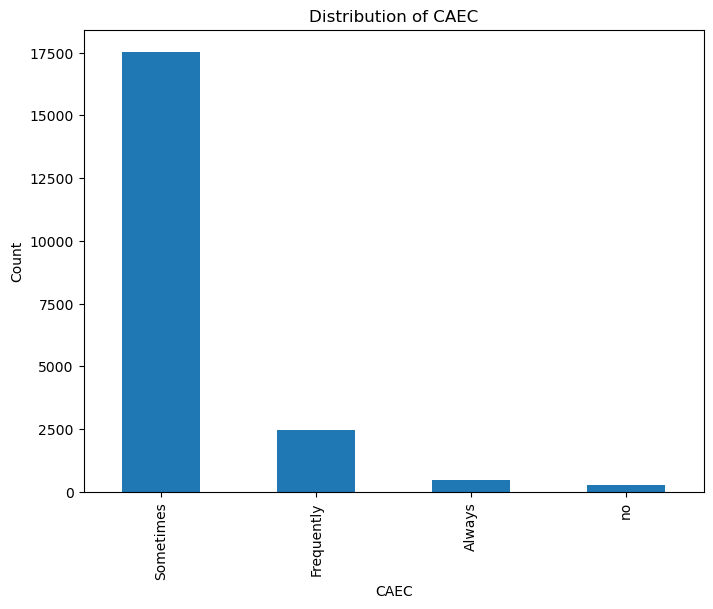

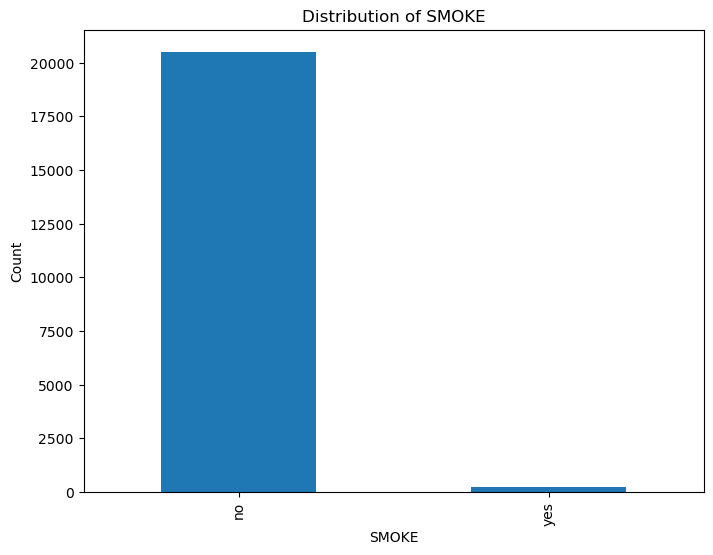

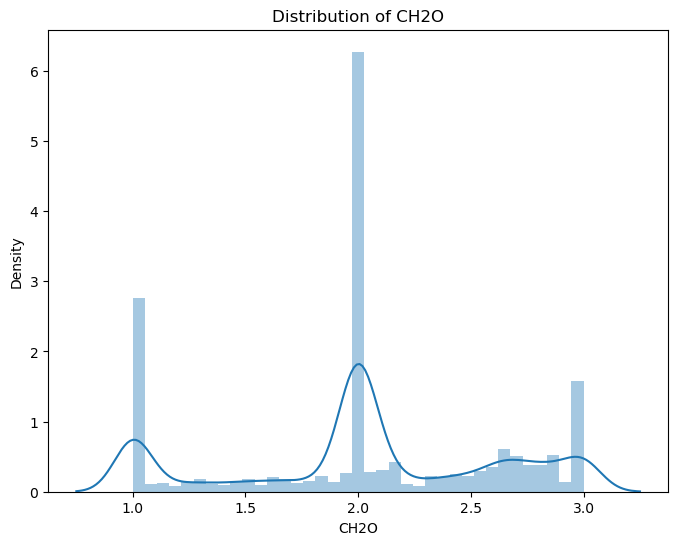

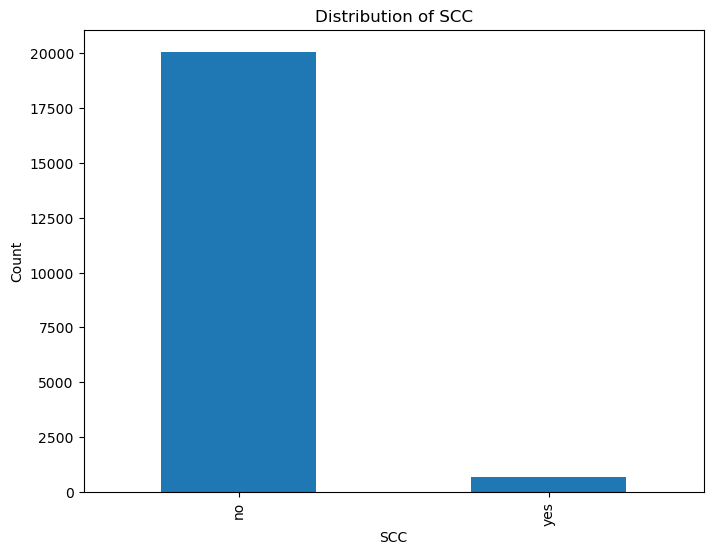

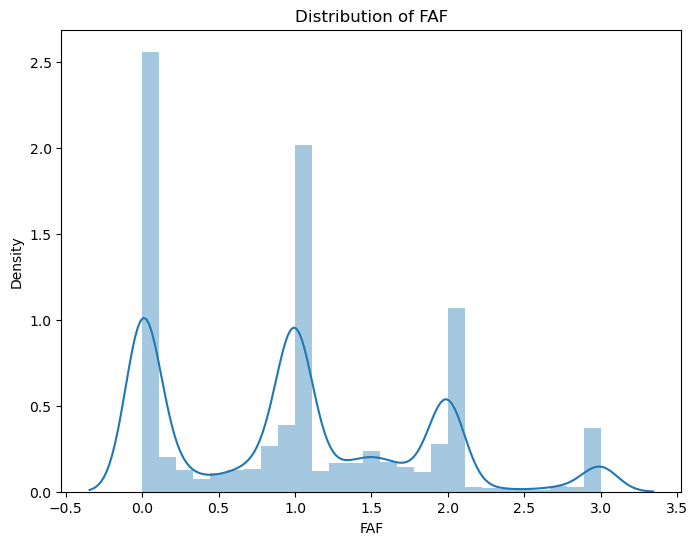

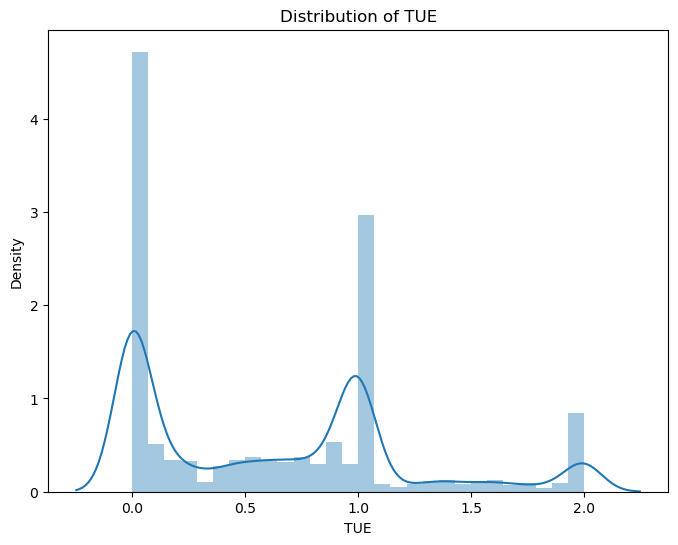

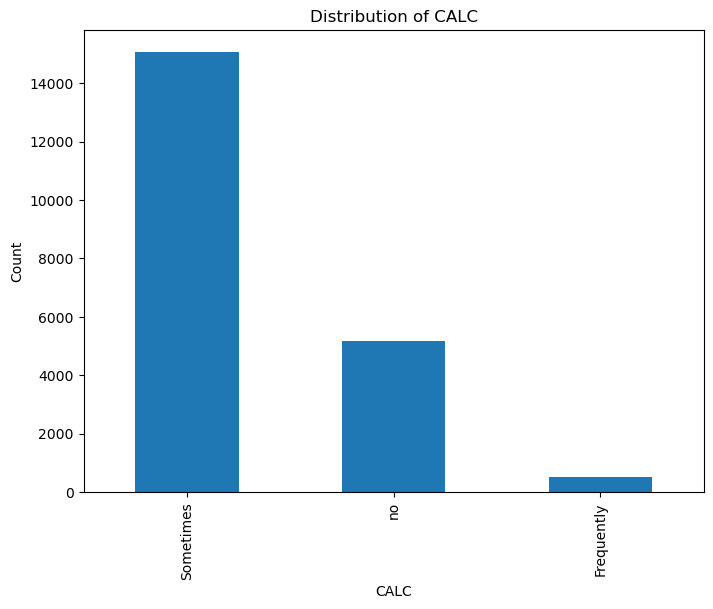

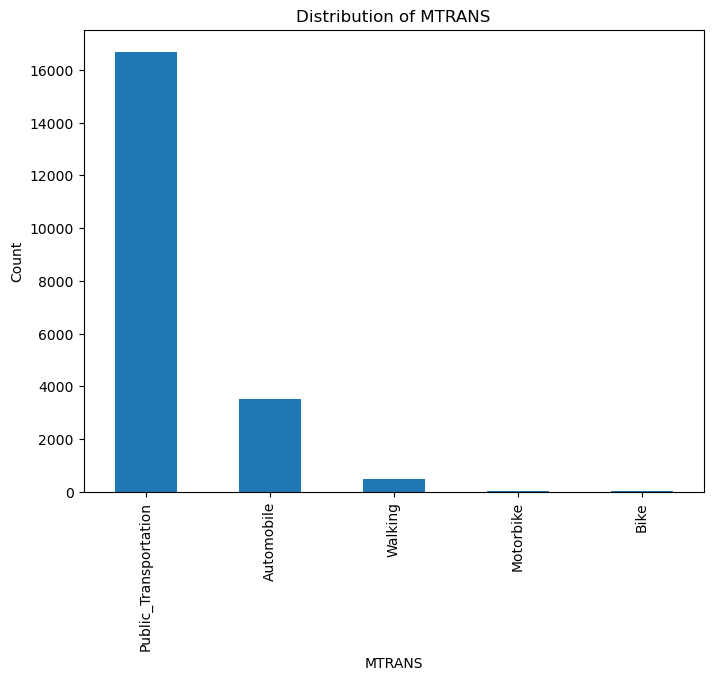

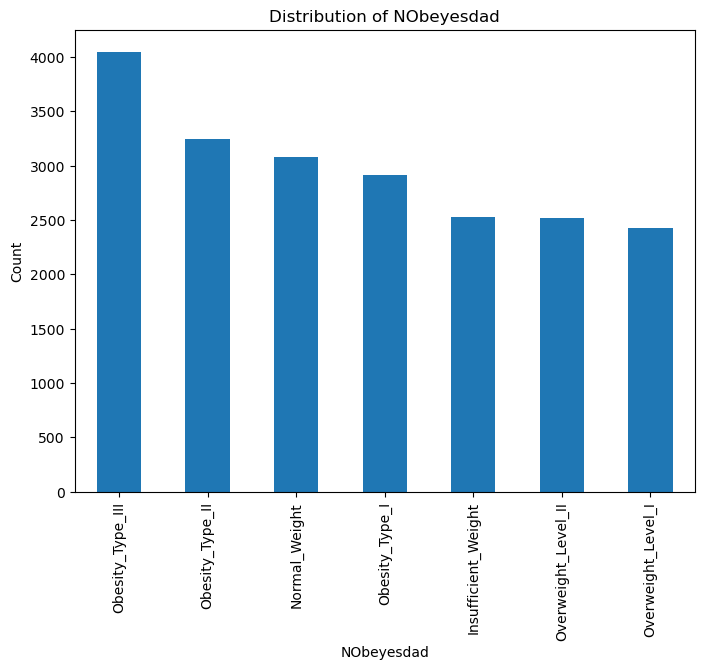

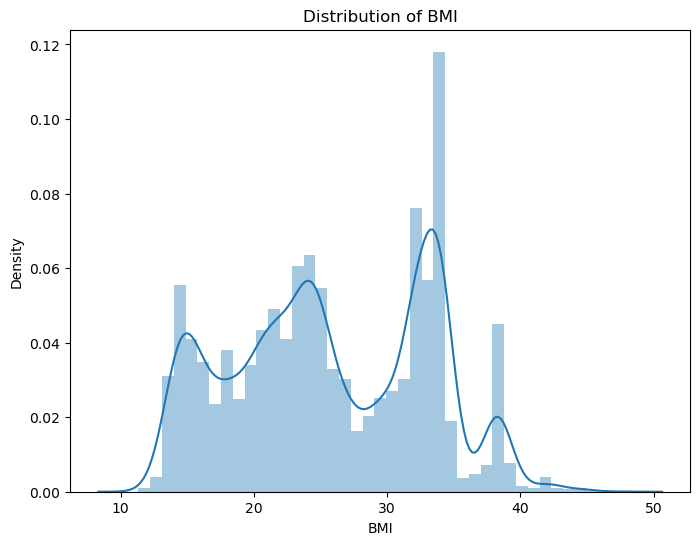

In [8]:

for col in obesity.columns:
    plt.figure(figsize=(8, 6))
    
    try:
        # Numerical columns
        if obesity[col].dtype in ['int64', 'float64']:
            sns.distplot(obesity[col])
            plt.xlabel(col)
            plt.ylabel('Density')
            plt.title(f'Distribution of {col}')
        
        # Categorical columns
        else:
            obesity[col].value_counts().plot(kind='bar')
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.title(f'Distribution of {col}')
        
        plt.show()
    
    except (KeyError, TypeError):
        print(f"Error occurred while processing column '{col}'. Skipping this column.")

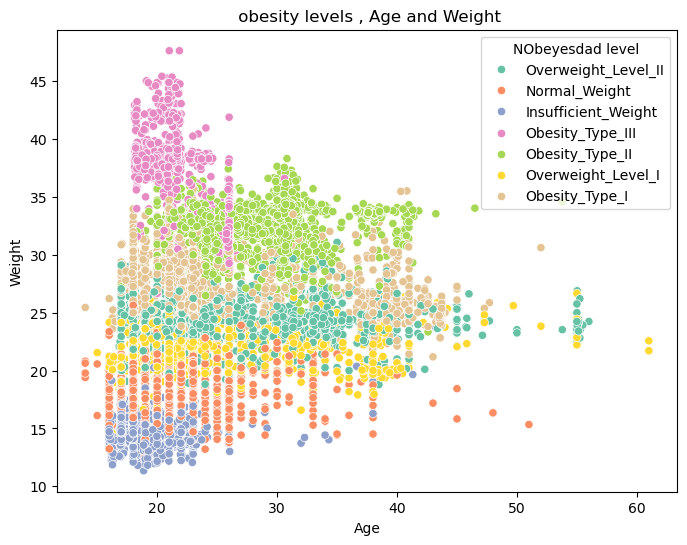

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=obesity, x='Age', y='BMI', hue='NObeyesdad', palette='Set2')
plt.title(' obesity levels , Age and Weight')
plt.xlabel('Age')
plt.ylabel('Weight')
plt.legend(title='NObeyesdad level')
plt.show()

<Figure size 800x600 with 0 Axes>

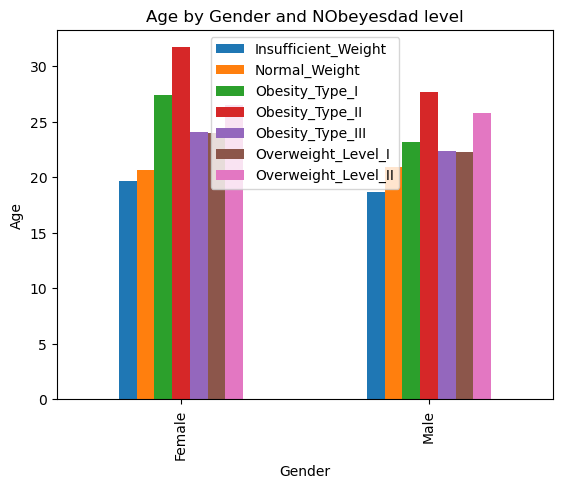

In [9]:

# Create the grouped bar plot
plt.figure(figsize=(8, 6))
obesity.groupby(['Gender', 'NObeyesdad'])['Age'].mean().unstack(fill_value=0).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender and NObeyesdad level')
plt.legend()
plt.show()

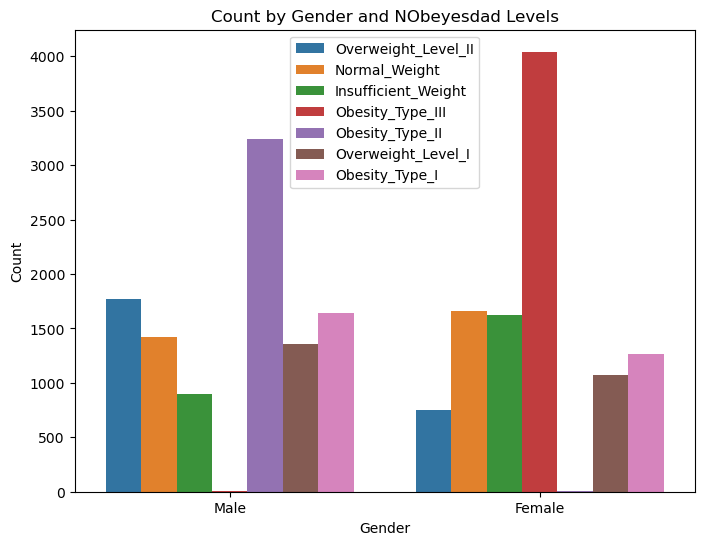

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='NObeyesdad', data=obesity)

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count by Gender and NObeyesdad Levels')
plt.legend()
plt.show()

* from the plot we see that obesity is more among the females

In [11]:
obesity.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  24.020602  
1  1.000000         no             Automobile        Normal_Weight  18.269231  
2  1.673584         no  Public_Transportation  Insufficient_Weight  14.655836  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  38.368080  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  24.500768

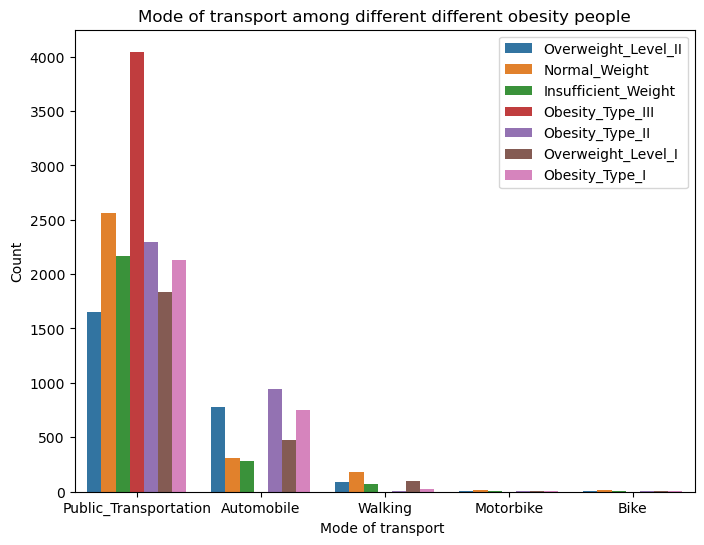

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=obesity)

plt.xlabel('Mode of transport ')
plt.ylabel('Count')
plt.title('Mode of transport among different different obesity people')
plt.legend()
plt.show()

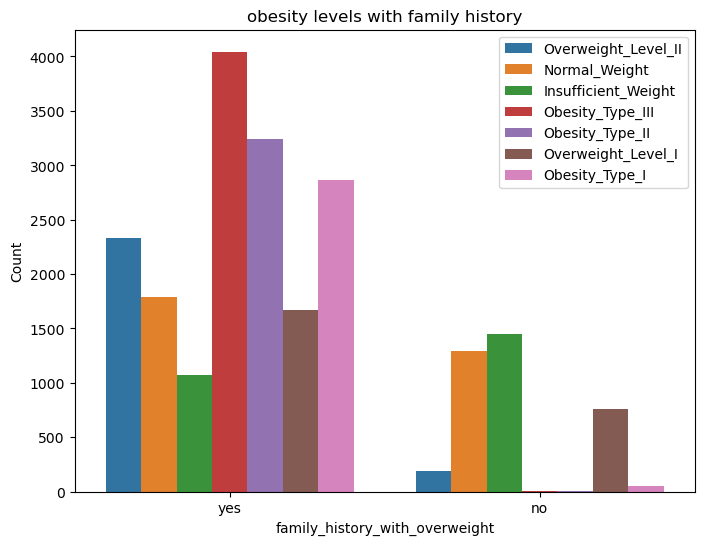

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='family_history_with_overweight', hue='NObeyesdad', data=obesity)

plt.xlabel('family_history_with_overweight')
plt.ylabel('Count')
plt.title('obesity levels with family history')
plt.legend()
plt.show()

* from the bar we it shows that family_history with obesity has highest levels of obesity

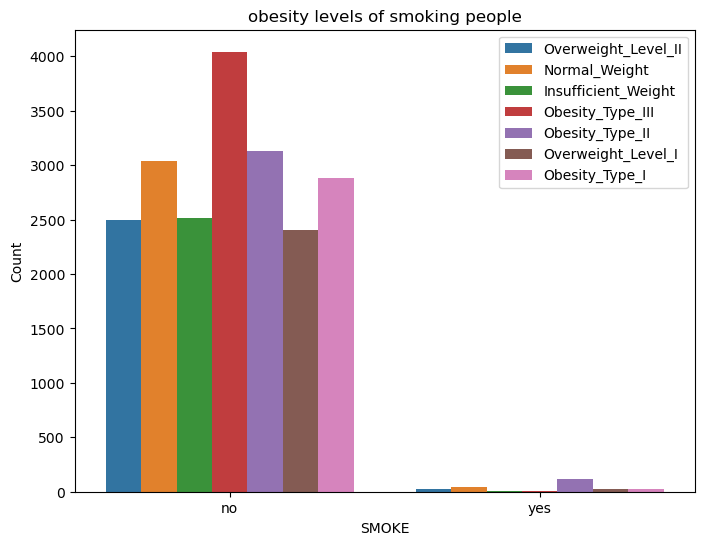

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SMOKE', hue='NObeyesdad', data=obesity)

plt.xlabel('SMOKE')
plt.ylabel('Count')
plt.title('obesity levels of smoking people')
plt.legend()
plt.show()

* obesity is observed among the youngsters

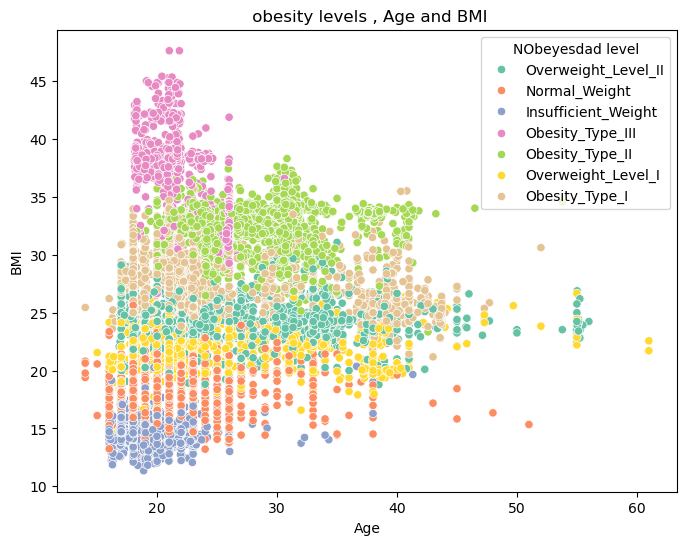

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=obesity, x='Age', y='BMI', hue='NObeyesdad', palette='Set2')
plt.title(' obesity levels , Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='NObeyesdad level')
plt.show()

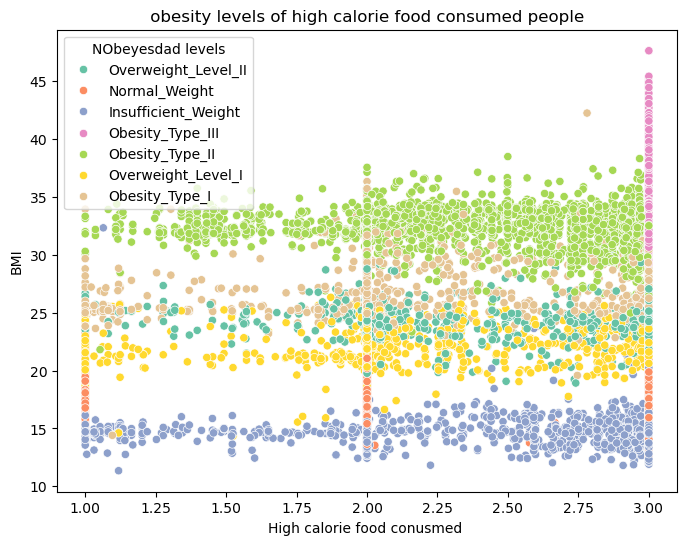

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=obesity, x='FCVC', y='BMI', hue='NObeyesdad', palette='Set2')
plt.title(' obesity levels of high calorie food consumed people ')
plt.xlabel('High calorie food conusmed ')
plt.ylabel('BMI')
plt.legend(title='NObeyesdad levels')
plt.show()

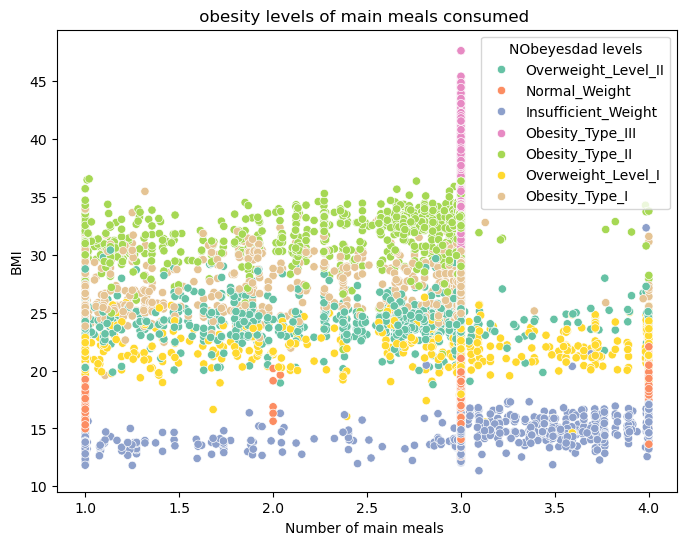

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=obesity, x='NCP', y='BMI', hue='NObeyesdad', palette='Set2')
plt.title(' obesity levels of main meals consumed  ')
plt.xlabel('Number of main meals ')
plt.ylabel('BMI')
plt.legend(title='NObeyesdad levels')
plt.show()

In [49]:
obesity.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.443011  1.699998   81.669950                            yes   
1  Female  18.000000  1.560000   57.000000                            yes   
2  Female  18.000000  1.711460   50.165754                            yes   
3  Female  20.952737  1.710730  131.274851                            yes   
4    Male  31.641081  1.914186   93.798055                            yes   

  FAVC      FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF  \
0  yes  2.000000  2.983297   Sometimes    no  2.763573  no  0.000000   
1  yes  2.000000  3.000000  Frequently    no  2.000000  no  1.000000   
2  yes  1.880534  1.411685   Sometimes    no  1.910378  no  0.866045   
3  yes  3.000000  3.000000   Sometimes    no  1.674061  no  1.467863   
4  yes  2.679664  1.971472   Sometimes    no  1.979848  no  1.967973   

        TUE       CALC                 MTRANS           NObeyesdad        BMI  
0  0.976473  Sometimes  Public_Transportation  Overweight_Level_II  24.020602  
1  1.000000         no             Automobile        Normal_Weight  18.269231  
2  1.673584         no  Public_Transportation  Insufficient_Weight  14.655836  
3  0.780199  Sometimes  Public_Transportation     Obesity_Type_III  38.368080  
4  0.931721  Sometimes  Public_Transportation  Overweight_Level_II  24.500768

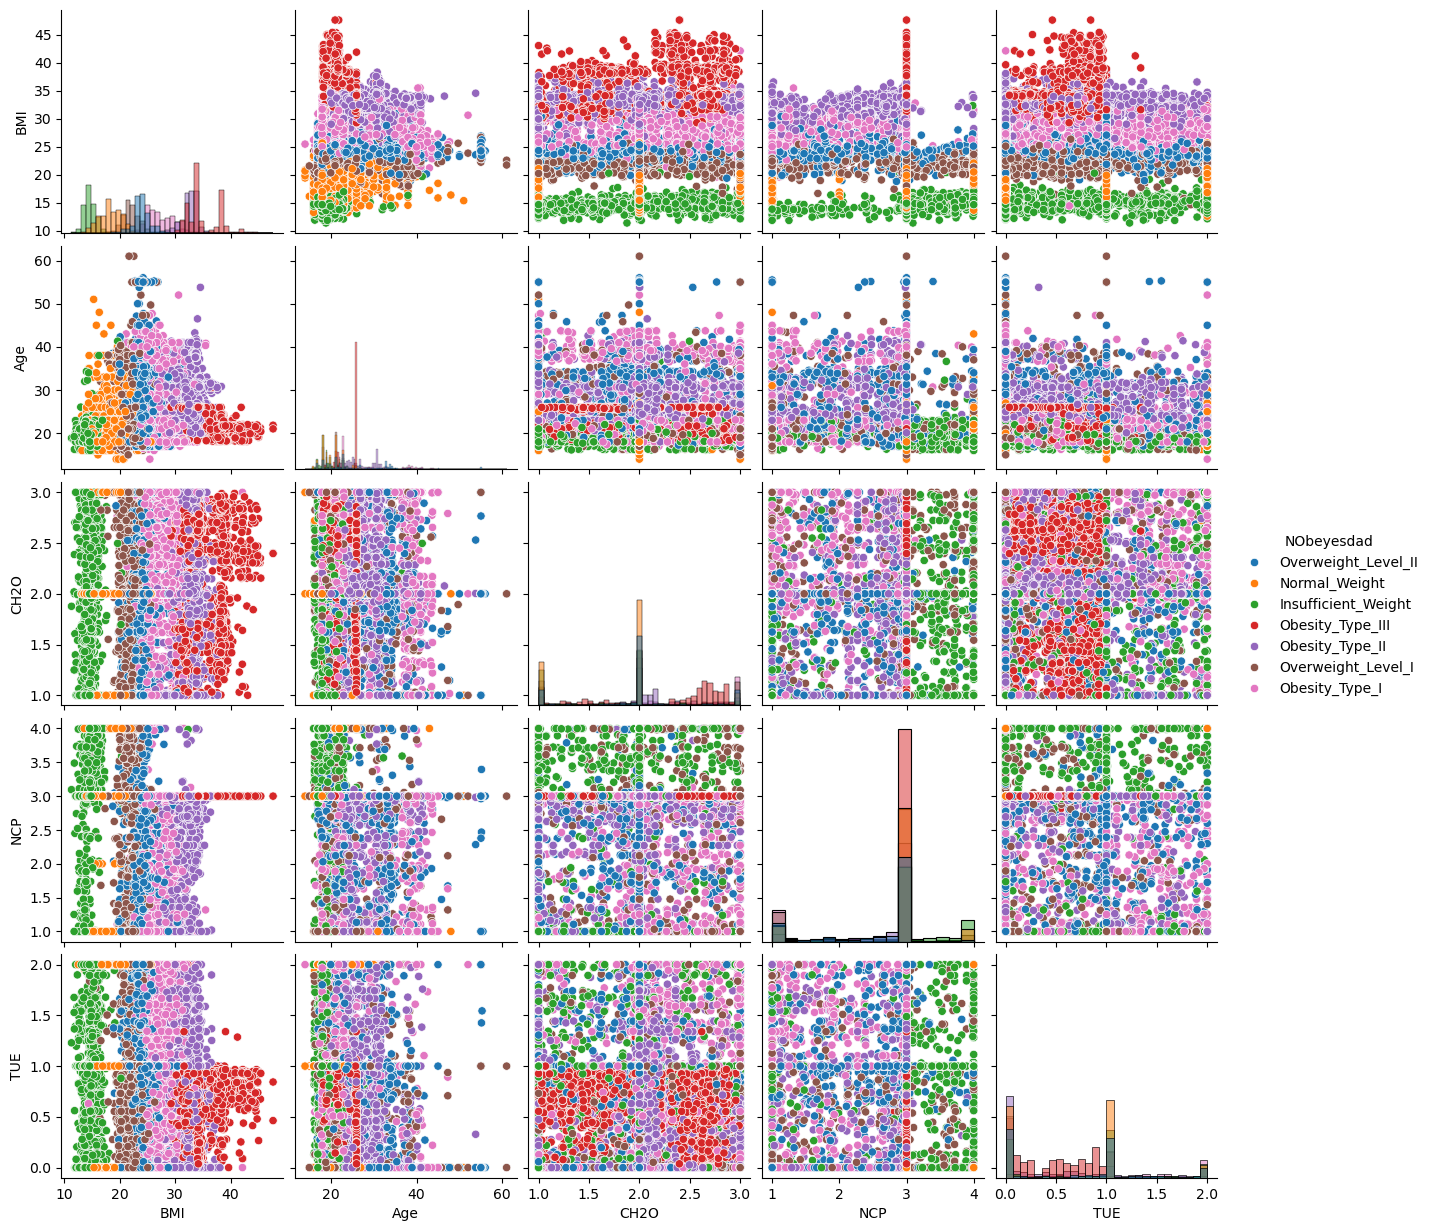

In [51]:
subset = obesity[['BMI','Age','CH2O','NCP','NObeyesdad','TUE']]
sns.pairplot(subset, hue="NObeyesdad", diag_kind='hist')
plt.show()


In [52]:
obesity.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder



label_encoder = LabelEncoder()
#obesity['Gender'] = label_encoder.fit_transform(obesity['Gender'])


categorical_columns = [col for col in obesity.columns if obesity[col].dtype == "object"]


for col in categorical_columns:
    obesity[col]= label_encoder.fit_transform(obesity[col])
    

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming X contains features and y contains the target variable
X = obesity.drop('NObeyesdad', axis=1)
y = obesity['NObeyesdad']

# Step 1: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Preprocess the Data (if necessary)

# Step 3: Train the Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Step 4: Evaluate the Model
y_pred = regression_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Step 5: Identify Major Contributors
coefficients = regression_model.coef_
feature_names = X.columns
sorted_indices = np.argsort(np.abs(coefficients))[::-1]

print("\n Major Contributors to the Target Variable:")
for i in sorted_indices:
    print(f"{feature_names[i]}: {coefficients[i]}")


Mean Squared Error: 2.5587716565248635

 Major Contributors to the Target Variable:
Height: -3.3711597823168087
FAVC: -0.7196153077483675
family_history_with_overweight: 0.6251628655473899
CAEC: 0.5552446687330282
CALC: -0.4640119990530604
SMOKE: -0.30734312736287855
SCC: 0.26423566512932084
NCP: -0.256072114716584
Gender: 0.24900737883120003
CH2O: 0.2261627971953776
FCVC: -0.1881634961640942
MTRANS: 0.07148040123087371
Age: 0.05350970652485379
TUE: 0.047187679456022515
FAF: 0.0363922384336886
Weight: 0.024242108684652656


In [85]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
sorted_indices_rf = np.argsort(feature_importances)[::-1]

print("Feature Importance (Random Forest):")
for i in sorted_indices_rf:
    print(f"{feature_names[i]}: {feature_importances[i]}")


Feature Importance (Random Forest):
Weight: 0.6446917424491327
Height: 0.14347651841532524
Age: 0.042397840419730985
FCVC: 0.03509138970454452
NCP: 0.02071999148366648
FAF: 0.018164592842641047
Gender: 0.0176504855244133
CH2O: 0.016714936211823843
TUE: 0.013959081657016311
CALC: 0.01254249857675798
CAEC: 0.010574124570954985
FAVC: 0.010054369313126511
MTRANS: 0.005220738963872538
family_history_with_overweight: 0.004845560568904378
SCC: 0.0029639021633397836
SMOKE: 0.0009322271347494537
